# Exploration of wireless network RF calculations

Free space loss equation: http://www.tapr.org/ve3jf.dcc97.html
Assuming isotropic receiving antenna

$$
L_p = 32.4 + 20 log \,f + 20 log\,d\,dB\\
f\,in\,MHz,\,d\,in\,km
$$




Now lets combine this with the antenna gains and cable losses

\begin{align}
P_r & = P_t - L_p + G_t + G_r - L_t - L_r\\
\\
where &\\
\\
P_t & = transmitter\,power\,output\,(dBm\,or\,dBW,\,same\,units\,as\,P_r)\\
...&\\
\end{align}


Not taking into account refraction, defraction and reflection we can compute the loss. From [here](https://www.signalboosters.com/blog/what-is-decibel-db-gain-and-how-does-it-relate-to-cell-phone-reception) we can see that mobile phones operate in ideal conditions at - 50 dB and stop operating at - 100 dB. This post also shows you how to check your network readings from you iPhone/Android.

In [2]:
import math

In [3]:
L_p = 32.4 + (20 * math.log10(915)) + (20 * math.log10(10))
P_t = 24
G_t = 25
G_r = 12
L_t = 2
L_r = 2
P_r = P_t - L_p + G_t + G_r - L_t - L_r
P_r

-54.62842188132896

### Now lets explore the loss as we increase the frequency upto millimeter wave (mmWave)

In [4]:
def calc_loss(freq, distance, tr_pwr=24, tr_gain=10, rec_gain=10, tr_loss=2, rec_loss=2):
    """ Calculate the path loss for a frequency and distance
    
    Keyword arguments:
    freq -- the frequnecy in MHz
    distance -- the distance in km
    tr_pwr -- the transmitter power in dB
    tr_gain -- the transmitter gain in dB
    rec_gain -- the receiver gain in dB
    tr_loss - the transmitter loss in dB
    rec_loss - the receiver loss in dB
    """
    free_space_loss = 32.4 + (20 * math.log10(freq)) + (20 * math.log10(distance))
    path_loss = tr_pwr - free_space_loss + tr_gain  + rec_gain - tr_loss - rec_loss
    return path_loss

In [5]:
import numpy as np

In [6]:
losses = []
freq = np.arange(500, 10000, step=500)
dist = np.arange(0.00001, 20, step=0.2)
for x in freq:
    row = []
    for y in dist:
        row.append(calc_loss(x, y))
    losses.append(row)
        

In [7]:
l_a = np.array(losses)

In [8]:
for i in range(len(l_a)):
    print(l_a[i].mean())

-62.73381721669774
-68.75441712997736
-72.27624231109098
-74.77501704325698
-76.7132173034181
-78.29684222437061
-79.63577801698287
-80.79561695653662
-81.8186674054842
-82.73381721669773
-83.56167091986222
-84.31744213765019
-85.01268426283447
-85.6563779302625
-86.25564239781136
-86.81621686981622
-87.34279564426325
-87.83926731876383
-88.3088892357543


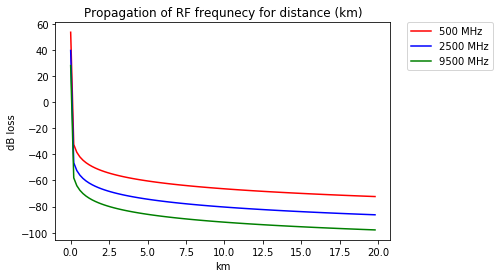

In [17]:
% matplotlib inline
import matplotlib.pyplot as plt

top = plt.plot(dist, l_a[0], 'r', label='%i MHz'% freq[0])
mid = plt.plot(dist, l_a[4], 'b', label='%i MHz'% freq[4])
bottom = plt.plot(dist, l_a[-1], 'g', label='%i MHz'% freq[-1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Propagation of RF frequnecy for distance (km)")
plt.ylabel('dB loss')
plt.xlabel('km')
plt.show()

Now we want to check the distance at which each frequency hits -50 and -75 dB loss

In [59]:
def calc_loss_at_distance(loss, distance):

    hits = []

    for c in l_a:
        for i, l in enumerate(c):
            if l <= loss:

                hits.append(distance[i])
                break
    return hits

hits_fifty = calc_loss_at_distance(-50, dist)
hits_seventy = calc_loss_at_distance(-70, dist)
        
        

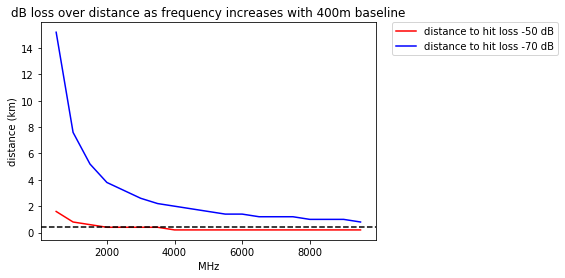

In [64]:
neg_fifty = plt.plot(freq, hits_fifty, 'r', label='distance to hit loss -50 dB')
neg_seventy = plt.plot(freq, hits_seventy, 'b', label='distance to hit loss -70 dB')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("dB loss over distance as frequency increases with 400m baseline")
plt.ylabel('distance (km)')
plt.xlabel('MHz')
plt.axhline(0.4, linestyle='--', color='k') # horizontal lines
plt.show()